## Clean Dataset
### Core PCOS Dataset

In [ ]:
import pandas as pd

# Load the Core PCOS Dataset
core_pcos_path = "Core_PCOS_Dataset_Cleaned.csv"
core_pcos_df = pd.read_csv(core_pcos_path)

# Display basic information about the dataset
core_pcos_df.info(), core_pcos_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  1082 non-null   int64  
 1   Patient File No.        1082 non-null   int64  
 2   PCOS (Y/N)              1082 non-null   int64  
 3    Age (yrs)              1082 non-null   float64
 4   Weight (Kg)             1082 non-null   float64
 5   Height(Cm)              1082 non-null   float64
 6   BMI                     1082 non-null   float64
 7   Blood Group             1082 non-null   float64
 8   Pulse rate(bpm)         1082 non-null   float64
 9   RR (breaths/min)        1082 non-null   float64
 10  Hb(g/dl)                1082 non-null   float64
 11  Cycle(R/I)              1082 non-null   float64
 12  Cycle length(days)      1082 non-null   float64
 13  Marraige Status (Yrs)   1082 non-null   float64
 14  Pregnant(Y/N)           1082 non-null   

(None,
    Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
 0       1                 1           0        28.0         44.6        152.0   
 1       2                 2           0        36.0         65.0        161.5   
 2       3                 3           1        33.0         68.8        165.0   
 3       4                 4           0        37.0         65.0        148.0   
 4       5                 5           0        25.0         52.0        161.0   
 
     BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  Pimples(Y/N)  \
 0  19.3         15.0              78.0              22.0  ...           0.0   
 1  24.9         15.0              74.0              20.0  ...           0.0   
 2  25.3         11.0              72.0              18.0  ...           1.0   
 3  29.7         13.0              72.0              20.0  ...           0.0   
 4  20.1         11.0              72.0              18.0  ...           0.0   
 
    Fast food (Y/

In [ ]:
import plotly.express as px

# Count of PCOS Diagnosis
pcos_counts = core_pcos_df["PCOS (Y/N)"].value_counts()

# Create interactive bar chart
fig = px.bar(pcos_counts,
             x=pcos_counts.index,
             y=pcos_counts.values,
             title="PCOS Diagnosis Distribution",
             labels={"x": "PCOS Status", "y": "Number of Patients"},
             color=pcos_counts.values,
             color_continuous_scale="Blues")

# Show plot
fig.show()


In [ ]:
import plotly.express as px

# Create histogram
fig = px.histogram(core_pcos_df,
                   x=" Age (yrs)",
                   color="PCOS (Y/N)",
                   title="Age Distribution in PCOS vs. Non-PCOS Patients",
                   labels={" Age (yrs)": "Age (Years)"},
                   nbins=15,
                   color_discrete_sequence=["royalblue", "lightblue"])

# Show plot
fig.show()


In [ ]:
import plotly.express as px

# Create histogram
fig = px.histogram(core_pcos_df,
                   x="BMI",
                   color="PCOS (Y/N)",
                   title="BMI Distribution in PCOS vs. Non-PCOS Patients",
                   labels={"BMI": "Body Mass Index"},
                   nbins=15,
                   color_discrete_sequence=["darkblue", "lightblue"])

# Show plot
fig.show()


In [ ]:
import plotly.express as px

# Create box plots
fig = px.box(core_pcos_df,
             x="PCOS (Y/N)",
             y=["FSH(mIU/mL)", "LH(mIU/mL)", "AMH(ng/mL)"],
             title="Hormonal Levels in PCOS vs. Non-PCOS Patients",
             labels={"PCOS (Y/N)": "PCOS Status"},
             color="PCOS (Y/N)",
             color_discrete_sequence=["royalblue", "lightblue"])

# Show plot
fig.show()


In [ ]:
import plotly.express as px

# Selecting symptom columns
symptom_cols = ["Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)",
                "Hair loss(Y/N)", "Pimples(Y/N)", "Fast food (Y/N)", "Reg.Exercise(Y/N)"]

# Count symptoms in PCOS vs. Non-PCOS
pcos_symptoms = core_pcos_df[core_pcos_df["PCOS (Y/N)"] == 1][symptom_cols].sum()
non_pcos_symptoms = core_pcos_df[core_pcos_df["PCOS (Y/N)"] == 0][symptom_cols].sum()

# Create horizontal bar chart
fig = px.bar(x=[pcos_symptoms, non_pcos_symptoms],
             y=symptom_cols,
             orientation="h",
             title="Symptom Prevalence in PCOS vs. Non-PCOS Patients",
             labels={"x": "Number of Patients", "y": "Symptoms"},
             color_discrete_sequence=["royalblue", "lightblue"])

# Show plot
fig.show()


In [ ]:
import plotly.express as px

# Create histogram for Systolic BP
fig = px.histogram(core_pcos_df,
                   x="BP _Systolic (mmHg)",
                   color="PCOS (Y/N)",
                   title="Systolic Blood Pressure in PCOS vs. Non-PCOS",
                   labels={"BP _Systolic (mmHg)": "Systolic BP"},
                   nbins=10,
                   color_discrete_sequence=["darkblue", "lightblue"])

fig.show()


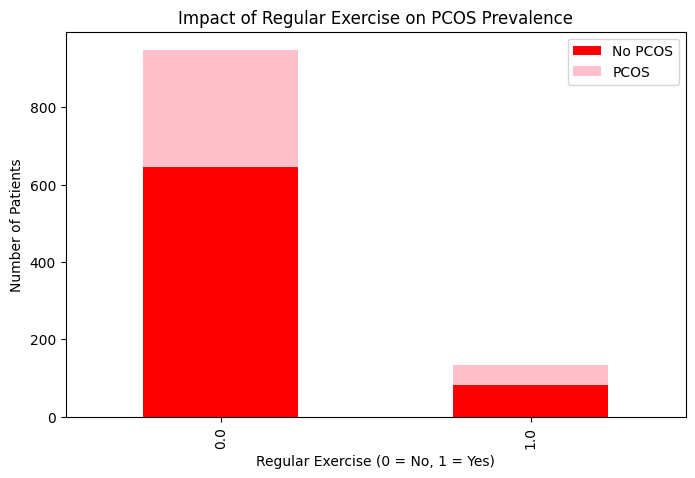

In [ ]:
# Count of PCOS occurrence among those who exercise vs. those who don’t
exercise_pcos = core_pcos_df.groupby("Reg.Exercise(Y/N)")["PCOS (Y/N)"].value_counts().unstack()

# Plot the impact of regular exercise on PCOS
exercise_pcos.plot(kind="bar", stacked=True, figsize=(8, 5), color=["red", "pink"])
plt.xlabel("Regular Exercise (0 = No, 1 = Yes)")
plt.ylabel("Number of Patients")
plt.title("Impact of Regular Exercise on PCOS Prevalence")
plt.legend(["No PCOS", "PCOS"])

plt.show()


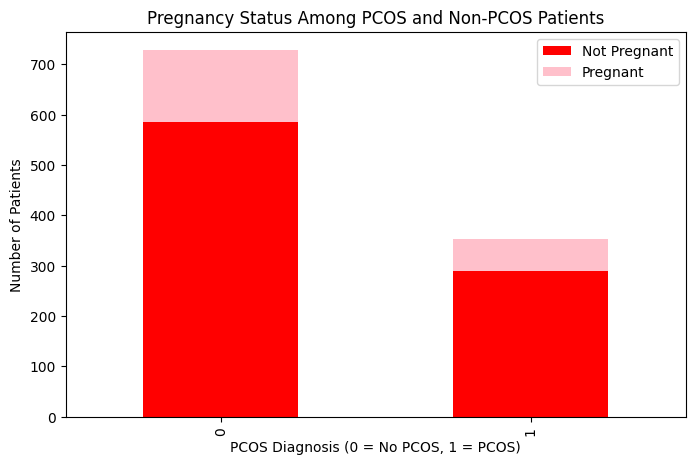

In [ ]:
# Count of Pregnancy Status in PCOS vs. Non-PCOS Patients
pregnancy_pcos = core_pcos_df.groupby("PCOS (Y/N)")["Pregnant(Y/N)"].value_counts().unstack()

# Plot pregnancy status comparison
pregnancy_pcos.plot(kind="bar", stacked=True, figsize=(8, 5), color=["red", "pink"])
plt.xlabel("PCOS Diagnosis (0 = No PCOS, 1 = PCOS)")
plt.ylabel("Number of Patients")
plt.title("Pregnancy Status Among PCOS and Non-PCOS Patients")
plt.legend(["Not Pregnant", "Pregnant"])

plt.show()


## Global PCOS dataset

In [ ]:
# Load the Global PCOS Demographics Dataset
global_pcos_path = "Global_PCOS_Demographics_Cleaned.csv"
global_pcos_df = pd.read_csv(global_pcos_path)

# Display basic information about the dataset
global_pcos_df.info(), global_pcos_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      120000 non-null  object 
 1   Age                          120000 non-null  int64  
 2   BMI                          120000 non-null  object 
 3   Menstrual_Regularity         120000 non-null  object 
 4   Hirsutism                    120000 non-null  object 
 5   Acne_Severity                59915 non-null   object 
 6   Family_History_of_PCOS       120000 non-null  object 
 7   Insulin_Resistance           120000 non-null  object 
 8   Lifestyle_Score              120000 non-null  int64  
 9   Stress_Levels                120000 non-null  object 
 10  Urban_Rural                  120000 non-null  object 
 11  Socioeconomic_Status         120000 non-null  object 
 12  Awareness_of_PCOS            120000 non-null  object 
 13 

(None,
       Country  Age          BMI Menstrual_Regularity Hirsutism Acne_Severity  \
 0  Madagascar   26   overweight              regular       yes        severe   
 1     Vietnam   16  underweight              regular       yes           NaN   
 2     Somalia   41       normal              regular        no      moderate   
 3      Malawi   27       normal            irregular        no          mild   
 4      France   26   overweight            irregular       yes           NaN   
 
   Family_History_of_PCOS Insulin_Resistance  Lifestyle_Score Stress_Levels  \
 0                    yes                yes                2           low   
 1                     no                yes                4          high   
 2                     no                 no                7        medium   
 3                     no                 no               10           low   
 4                     no                 no                7        medium   
 
   Urban_Rural Socioeconomic_

In [ ]:
import plotly.express as px

# Top 10 Countries with Highest PCOS Diagnoses
pcos_by_country_plotly = global_pcos_df[global_pcos_df["Diagnosis"] == "yes"]["Country"].value_counts().head(10).reset_index()
pcos_by_country_plotly.columns = ["Country", "PCOS Cases"]

# Create interactive bar chart
fig = px.bar(pcos_by_country_plotly, x="Country", y="PCOS Cases",
             title="Top 10 Countries with Highest PCOS Diagnoses",
             labels={"PCOS Cases": "Number of PCOS Diagnoses"},
             color="PCOS Cases", color_continuous_scale="blues")

# Show plot
fig.show()


In [ ]:
# Interactive Histogram for Age Distribution of PCOS and Non-PCOS Patients

fig = go.Figure()

# Add traces for PCOS and Non-PCOS
fig.add_trace(go.Histogram(
    x=global_pcos_df[global_pcos_df["Diagnosis"] == "yes"]["Age"],
    name="PCOS", opacity=0.7, marker_color="royalblue"
))

fig.add_trace(go.Histogram(
    x=global_pcos_df[global_pcos_df["Diagnosis"] == "no"]["Age"],
    name="No PCOS", opacity=0.5, marker_color="skyblue"
))

# Update layout
fig.update_layout(
    title="Age Distribution Among PCOS and Non-PCOS Patients",
    xaxis_title="Age (years)",
    yaxis_title="Number of Patients",
    barmode="overlay",
    template="plotly_white"
)

# Show plot
fig.show()


In [ ]:
# Interactive Stacked Bar Chart for BMI Categories and PCOS Diagnosis

# Count of PCOS Diagnoses by BMI Category
bmi_pcos_counts = global_pcos_df.groupby("BMI")["Diagnosis"].value_counts().unstack().reset_index()
bmi_pcos_counts.columns = ["BMI Category", "No PCOS", "PCOS"]

# Create interactive stacked bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=bmi_pcos_counts["BMI Category"],
    y=bmi_pcos_counts["No PCOS"],
    name="No PCOS", marker_color="skyblue"
))

fig.add_trace(go.Bar(
    x=bmi_pcos_counts["BMI Category"],
    y=bmi_pcos_counts["PCOS"],
    name="PCOS", marker_color="royalblue"
))

# Update layout
fig.update_layout(
    title="BMI Category vs. PCOS Diagnosis",
    xaxis_title="BMI Category",
    yaxis_title="Number of Patients",
    barmode="stack",
    template="plotly_white"
)

# Show plot
fig.show()


In [ ]:
# Interactive Grouped Bar Chart for Menstrual Regularity and PCOS Diagnosis

# Count of PCOS Diagnoses by Menstrual Regularity
menstrual_pcos_counts = global_pcos_df.groupby("Menstrual_Regularity")["Diagnosis"].value_counts().unstack().reset_index()
menstrual_pcos_counts.columns = ["Menstrual Regularity", "No PCOS", "PCOS"]

# Create interactive grouped bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=menstrual_pcos_counts["Menstrual Regularity"],
    y=menstrual_pcos_counts["No PCOS"],
    name="No PCOS", marker_color="skyblue"
))

fig.add_trace(go.Bar(
    x=menstrual_pcos_counts["Menstrual Regularity"],
    y=menstrual_pcos_counts["PCOS"],
    name="PCOS", marker_color="royalblue"
))

# Update layout
fig.update_layout(
    title="Menstrual Regularity vs. PCOS Diagnosis",
    xaxis_title="Menstrual Regularity",
    yaxis_title="Number of Patients",
    barmode="group",
    template="plotly_white"
)

# Show plot
fig.show()


In [ ]:
# Interactive Bar Chart for Impact of Stress Levels on PCOS Diagnosis

# Count of PCOS Diagnoses by Stress Levels
stress_pcos_counts = global_pcos_df.groupby("Stress_Levels")["Diagnosis"].value_counts().unstack().reset_index()
stress_pcos_counts.columns = ["Stress Levels", "No PCOS", "PCOS"]

# Create interactive grouped bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=stress_pcos_counts["Stress Levels"],
    y=stress_pcos_counts["No PCOS"],
    name="No PCOS", marker_color="skyblue"
))

fig.add_trace(go.Bar(
    x=stress_pcos_counts["Stress Levels"],
    y=stress_pcos_counts["PCOS"],
    name="PCOS", marker_color="royalblue"
))

# Update layout
fig.update_layout(
    title="Impact of Stress Levels on PCOS Diagnosis",
    xaxis_title="Stress Levels",
    yaxis_title="Number of Patients",
    barmode="group",
    template="plotly_white"
)

# Show plot
fig.show()


## LifeStyle dataset

In [ ]:
# Load the Lifestyle & Diet Dataset
lifestyle_diet_path = "Lifestyle_Diet_Dataset_Cleaned.csv"
lifestyle_diet_df = pd.read_csv(lifestyle_diet_path)

# Display basic information about the dataset
lifestyle_diet_df.info(), lifestyle_diet_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 49 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Age in Years                                                                    446 non-null    float64
 1   Weight in Kg                                                                    446 non-null    float64
 2   Height in Cm _ Feet                                                             446 non-null    float64
 3   Can you tell us your blood group                                                446 non-null    float64
 4   After how many months do you get your periods select 1_ if every month_regular  446 non-null    float64
 5   Have you gained weight recently                                                 446 non-null    float64
 6   Do you have excess

(None,
    Age in Years  Weight in Kg  Height in Cm _ Feet  \
 0          21.0          47.0                168.0   
 1          21.0          45.0                156.0   
 2          17.0          37.0                162.0   
 3          28.0          54.0                160.0   
 4          45.0          40.0                150.0   
 
    Can you tell us your blood group   \
 0                               13.0   
 1                               11.0   
 2                               15.0   
 3                               15.0   
 4                               13.0   
 
    After how many months do you get your periods select 1_ if every month_regular  \
 0                                                1.0                                
 1                                                1.0                                
 2                                                1.0                                
 3                                                1.0                

In [ ]:
import plotly.graph_objects as go

# Count of Exercise Frequency
exercise_counts = lifestyle_diet_df["Exercise_Frequency"].value_counts()

# Create interactive bar chart using Plotly Graph Objects
fig = go.Figure()

fig.add_trace(go.Bar(
    x=exercise_counts.index,
    y=exercise_counts.values,
    marker=dict(color="green", opacity=0.7),
    text=exercise_counts.values,
    textposition="outside"
))

# Update layout
fig.update_layout(
    title="Exercise Frequency Distribution",
    xaxis_title="Exercise Frequency",
    yaxis_title="Number of Individuals",
    template="plotly_white"
)

# Show plot
fig.show()

In [ ]:
# Summing up consumption of different food categories
diet_categories = [
    "Diet_Bread_Cereals", "Diet_Milk_Products", "Diet_Fruits", "Diet_Vegetables",
    "Diet_Starchy_Vegetables", "Diet_NonStarchy_Vegetables", "Diet_Fats",
    "Diet_Sweets", "Diet_Fried_Food", "Diet_Tea_Coffee", "Diet_Multivitamin"
]

diet_sums = lifestyle_diet_df[diet_categories].sum().sort_values(ascending=False)

# Create interactive bar chart using Plotly Graph Objects
fig = go.Figure()

fig.add_trace(go.Bar(
    x=diet_sums.index,
    y=diet_sums.values,
    marker=dict(color="orange", opacity=0.7),
    text=diet_sums.values,
    textposition="outside"
))

# Update layout
fig.update_layout(
    title="Dietary Habits Overview",
    xaxis_title="Food Categories",
    yaxis_title="Total Consumption Count",
    template="plotly_white"
)

# Show plot
fig.show()

In [ ]:
# Count of Sleep Hours Distribution
sleep_counts = lifestyle_diet_df["Sleep_Hours"].value_counts().sort_index()

# Create interactive bar chart using Plotly Graph Objects
fig = go.Figure()

fig.add_trace(go.Bar(
    x=sleep_counts.index,
    y=sleep_counts.values,
    marker=dict(color="royalblue", opacity=0.7),
    text=sleep_counts.values,
    textposition="outside"
))

# Update layout
fig.update_layout(
    title="Sleep Duration Distribution",
    xaxis_title="Sleep Duration (Hours)",
    yaxis_title="Number of Individuals",
    template="plotly_white"
)

# Show plot
fig.show()

In [ ]:
# Count of Stress Levels Distribution
stress_counts = lifestyle_diet_df["Stress_Level"].value_counts().sort_index()

# Create interactive bar chart using Plotly Graph Objects
fig = go.Figure()

fig.add_trace(go.Bar(
    x=stress_counts.index,
    y=stress_counts.values,
    marker=dict(color="crimson", opacity=0.7),
    text=stress_counts.values,
    textposition="outside"
))

# Update layout
fig.update_layout(
    title="Stress Levels Distribution",
    xaxis_title="Stress Levels",
    yaxis_title="Number of Individuals",
    template="plotly_white"
)

# Show plot
fig.show()

In [ ]:
# Count of Smoking Habits
smoking_counts = lifestyle_diet_df["Smoking"].value_counts()

# Create interactive bar chart using Plotly Graph Objects
fig = go.Figure()

fig.add_trace(go.Bar(
    x=smoking_counts.index,
    y=smoking_counts.values,
    marker=dict(color="brown", opacity=0.7),
    text=smoking_counts.values,
    textposition="outside"
))

# Update layout
fig.update_layout(
    title="Smoking Habits Distribution",
    xaxis_title="Smoking Status",
    yaxis_title="Number of Individuals",
    template="plotly_white"
)

# Show plot
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Selecting exercise type and diet categories
diet_columns = [
    "Diet_Bread_Cereals", "Diet_Milk_Products", "Diet_Fruits", "Diet_Vegetables",
    "Diet_Starchy_Vegetables", "Diet_NonStarchy_Vegetables", "Diet_Fats",
    "Diet_Sweets", "Diet_Fried_Food", "Diet_Tea_Coffee", "Diet_Multivitamin"
]

# Group by Exercise Type and get the average diet habits
exercise_diet_avg = lifestyle_diet_df.groupby("Exercise_Type")[diet_columns].mean()

# Create a heatmap
fig = px.imshow(exercise_diet_avg,
                labels=dict(x="Diet Choices", y="Exercise Type", color="Average Consumption"),
                x=exercise_diet_avg.columns,
                y=exercise_diet_avg.index,
                color_continuous_scale="Viridis",
                title="Impact of Exercise Type on Diet Choices")

# Show plot
fig.show()


In [ ]:
import plotly.graph_objects as go

# Count of Sleep Hours and Stress Levels
sleep_stress_counts = lifestyle_diet_df.groupby("Sleep_Hours")["Stress_Level"].value_counts().unstack().fillna(0)

# Create interactive grouped bar chart
fig = go.Figure()

for stress_level in sleep_stress_counts.columns:
    fig.add_trace(go.Bar(
        x=sleep_stress_counts.index,
        y=sleep_stress_counts[stress_level],
        name=f"Stress Level: {stress_level}"
    ))

# Update layout
fig.update_layout(
    title="Relationship Between Sleep Hours and Stress Levels",
    xaxis_title="Sleep Duration",
    yaxis_title="Number of Individuals",
    barmode="group",
    template="plotly_white"
)

# Show plot
fig.show()


In [ ]:
import plotly.express as px

# Selecting key diet columns for comparison
diet_impact = lifestyle_diet_df[["Weight in Kg", "Diet_Fruits", "Diet_Vegetables", "Diet_Sweets", "Diet_Fried_Food"]]

# Create scatter plot for Diet Impact on Weight
fig = px.scatter_matrix(diet_impact,
                        dimensions=["Diet_Fruits", "Diet_Vegetables", "Diet_Sweets", "Diet_Fried_Food"],
                        color="Weight in Kg",
                        title="Effect of Diet on Weight",
                        labels={"Weight in Kg": "Weight"},
                        color_continuous_scale="Blues")

# Show plot
fig.show()


In [ ]:
import plotly.express as px

# Selecting diet columns
diet_columns = [
    "Diet_Bread_Cereals", "Diet_Milk_Products", "Diet_Fruits", "Diet_Vegetables",
    "Diet_Starchy_Vegetables", "Diet_NonStarchy_Vegetables", "Diet_Fats",
    "Diet_Sweets", "Diet_Fried_Food", "Diet_Tea_Coffee", "Diet_Multivitamin"
]

# Grouping by sleep hours
sleep_diet_avg = lifestyle_diet_df.groupby("Sleep_Hours")[diet_columns].mean()

# Create heatmap
fig = px.imshow(sleep_diet_avg.T,
                labels=dict(x="Sleep Hours", y="Food Type", color="Avg Consumption"),
                x=sleep_diet_avg.index,
                y=sleep_diet_avg.columns,
                color_continuous_scale="Blues",
                title="Food Intake Pattern Based on Sleep Hours")

# Show plot
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Load dataset
lifestyle_diet_df = pd.read_csv("Lifestyle_Diet_Dataset_Cleaned.csv")

# Count PCOS Diagnoses by Exercise Frequency
exercise_pcos_counts = lifestyle_diet_df.groupby("Exercise_Frequency")["PCOS"].value_counts().unstack()

# Create stacked bar chart
fig = px.bar(exercise_pcos_counts,
             barmode="stack",
             title="Impact of Exercise Frequency on PCOS Diagnosis",
             labels={"value": "Number of Individuals", "variable": "PCOS Status"},
             color_discrete_sequence=px.colors.sequential.Greens)

# Show plot
fig.show()


In [ ]:
import plotly.express as px

# Create box plot
fig = px.box(lifestyle_diet_df,
             x="PCOS",
             y="Weight in Kg",
             title="Relationship Between BMI and PCOS",
             labels={"PCOS": "PCOS Status", "Weight in Kg": "Weight (Kg)"},
             color="PCOS",
             color_discrete_sequence=px.colors.qualitative.Set1)

# Show plot
fig.show()


In [ ]:
import plotly.express as px

# Selecting diet columns
diet_columns = [
    "Diet_Bread_Cereals", "Diet_Milk_Products", "Diet_Fruits", "Diet_Vegetables",
    "Diet_Starchy_Vegetables", "Diet_NonStarchy_Vegetables", "Diet_Fats",
    "Diet_Sweets", "Diet_Fried_Food", "Diet_Tea_Coffee", "Diet_Multivitamin"
]

# Grouping by PCOS status
pcos_diet_avg = lifestyle_diet_df.groupby("PCOS")[diet_columns].mean()

# Create heatmap
fig = px.imshow(pcos_diet_avg.T,
                labels=dict(x="PCOS Status", y="Diet Type", color="Avg Consumption"),
                x=pcos_diet_avg.index,
                y=pcos_diet_avg.columns,
                color_continuous_scale="Oranges",
                title="PCOS and Diet Choices")

# Show plot
fig.show()


In [ ]:
import plotly.express as px

# Count PCOS and Mental Health Issues
mental_health_pcos = lifestyle_diet_df.groupby("PCOS")["Mental_Health"].value_counts().unstack().fillna(0)

# Create pie chart
fig = px.pie(mental_health_pcos.T,
             names=mental_health_pcos.columns,
             values=mental_health_pcos.sum(),
             title="PCOS and Mental Health Issues",
             color_discrete_sequence=px.colors.sequential.RdBu)

# Show plot
fig.show()



In [ ]:
import plotly.express as px

# Count PCOS Diagnoses by Insulin Resistance
insulin_pcos_counts = lifestyle_diet_df.groupby("PCOS")["Insulin_Resistance"].value_counts().unstack()

# Create bar chart
fig = px.bar(insulin_pcos_counts,
             barmode="group",
             title="PCOS and Insulin Resistance",
             labels={"value": "Number of Individuals", "variable": "PCOS Status"},
             color_discrete_sequence=px.colors.sequential.Sunset)

# Show plot
fig.show()


## PCOS Medication reaction

In [ ]:
# Load the PCOS Medication Reactions Dataset
pcos_med_reactions_path = "PCOS_Medication_Reactions_Cleaned.csv"
pcos_med_df = pd.read_csv(pcos_med_reactions_path)

# Display basic information about the dataset
pcos_med_df.info(), pcos_med_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Drug_Name  50 non-null     object 
 1   Age        50 non-null     float64
 2   Gender     49 non-null     object 
 3   Reaction   50 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.7+ KB


(None,
              Drug_Name   Age  Gender  \
 0             DEPAKOTE  41.0    Male   
 1  TOFACITINIB CITRATE  66.0  Female   
 2            METFORMIN  74.0    Male   
 3             DEPAKOTE  60.5    Male   
 4             DEPAKOTE  63.0  Female   
 
                                             Reaction  
 0                         Medication residue present  
 1                                      Osteomyelitis  
 2                                 Erysipelas, Sepsis  
 3  Balance disorder, Gait disturbance, Gait distu...  
 4                                   Weight increased  )

In [ ]:
import plotly.express as px

# Count the occurrences of each drug
drug_counts = pcos_med_df["Drug_Name"].value_counts()

# Create interactive bar chart
fig = px.bar(drug_counts,
             x=drug_counts.index,
             y=drug_counts.values,
             title="Most Common Medications Used for PCOS",
             labels={"x": "Drug Name", "y": "Number of Reports"},
             color=drug_counts.values,
             color_continuous_scale="Blues")

# Show plot
fig.show()


In [ ]:
import plotly.express as px

# Create histogram
fig = px.histogram(pcos_med_df,
                   x="Age",
                   title="Age Distribution of Individuals on PCOS Medications",
                   labels={"Age": "Age (Years)"},
                   nbins=10,
                   color_discrete_sequence=["teal"])

# Show plot
fig.show()


In [ ]:
import plotly.express as px

# Count occurrences of each reaction
reaction_counts = pcos_med_df["Reaction"].value_counts()

# Create bar chart
fig = px.bar(reaction_counts,
             x=reaction_counts.index,
             y=reaction_counts.values,
             title="Most Common Adverse Reactions to PCOS Medications",
             labels={"x": "Adverse Reaction", "y": "Number of Reports"},
             color=reaction_counts.values,
             color_continuous_scale="Reds")

# Show plot
fig.show()


In [ ]:
import plotly.express as px

# Count occurrences of each Drug-Reaction pair
drug_reaction_counts = pcos_med_df.groupby(["Drug_Name", "Reaction"]).size().reset_index(name="Count")

# Create heatmap
fig = px.density_heatmap(drug_reaction_counts,
                         x="Drug_Name",
                         y="Reaction",
                         z="Count",
                         title="Drug-Reaction Relationship for PCOS Medications",
                         labels={"Count": "Number of Reports"},
                         color_continuous_scale="Cividis")

# Show plot
fig.show()


In [ ]:
# Display actual column names to check for hidden spaces or formatting issues
print("Actual column names in dataset:")
print(core_pcos_df.columns.tolist())

# Strip spaces from column names and replace any irregular spaces with underscores
core_pcos_df.columns = core_pcos_df.columns.str.strip().str.replace(r"\s+", "_", regex=True)

# Display cleaned column names to verify the fix
print("\nCleaned column names:")
print(core_pcos_df.columns.tolist())

# Retry selecting "Age (yrs)" with cleaned name format
corrected_columns = [col for col in core_pcos_df.columns if "Age" in col]
print("\nPossible corrected column name for Age:", corrected_columns)
